In [7]:
# libraries
%load_ext autoreload
%autoreload 2

import numpy as np
import soundfile as sf
import sounddevice as sd
import matplotlib.pyplot as plt
import sys
%matplotlib inline

from scipy import signal, fft

from PDM2PCM import *
from PCM2PDM import *
from Serialize import *
from PlotSuite import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
wd = r"C:/Users/levyg/Documents/MEGA/Repositories/mems2sd_esp32/python/PDMSignalProcessing/PDM_C/"
fname1 = "data_bit"
fname2 = "data_cic_processed"
fname3 = "data_pcm"
fs_pdm = 5e6
R = 16

pdm_stream = np.loadtxt(wd+fname1, dtype=np.int32)
pcic_stream = np.loadtxt(wd+fname2, dtype=np.int32)
ccic_stream = np.loadtxt(wd+fname3, dtype=np.int32)

# pdm_stream = pdm_stream.view(dtype=np.uint8).ravel()
# pdm_stream = np.unpackbits(pdm_stream, axis=0).astype(np.int32)
# pdm_stream = 2*pdm_stream[-int(2e6):-int(1e6)]-1
# pdm_stream = pdm_stream/np.max(pdm_stream)

# fir_coeffs = cic_compensator_response(N=N, R=R, M=M, order=order, cutoff=90e3, att=300, fs=fs_pdm, freq_points=512, plot=True, lang='pt')
# cic_processed = CIC(decimation_factor=R, stages=N, differential_delay=M).process(pdm_stream)
# cic_processed = cic_processed/np.max(cic_processed)
# fir_processed = np.convolve(cic_processed, fir_coeffs, mode='valid')
# fir_processed = fir_processed/np.max(fir_processed)
pdm_cic_fir_plot(pdm_stream, pcic_stream, ccic_stream, fs_pdm, R, lang='pt')

SNR_1 = 44.008908, SNR_2 = 51.270710, SNR_3 = 51.270710


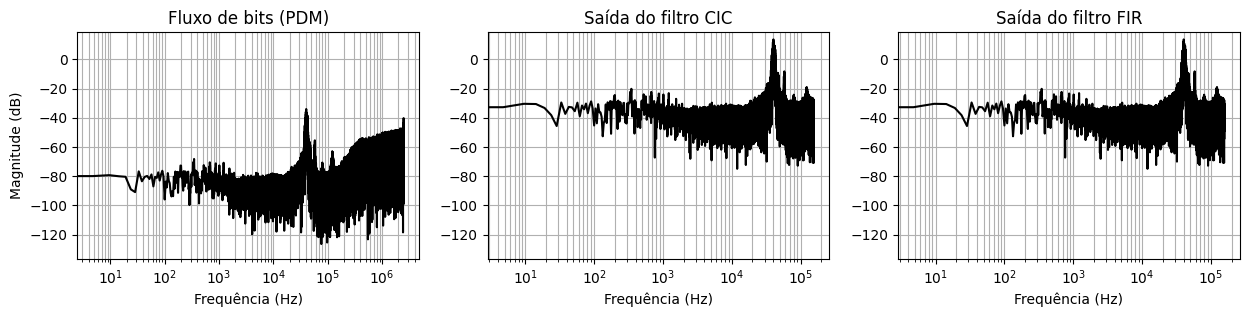

In [13]:
wd = r"C:/Users/levyg/Documents/MEGA/Repositories/mems2sd_esp32/python/PDMSignalProcessing/PDM_C/"
fname1 = "clipped_data_bit" # original
fname2 = "python_cic_processed" # Python CIC processed
fname3 = "python_cic_processed"
fs_pdm = 5e6
R = 16

pdm_stream = np.loadtxt(wd+fname1, dtype=np.int32)
pcic_stream = np.loadtxt(wd+fname2, dtype=np.int32)
ccic_stream = np.loadtxt(wd+fname3, dtype=np.int32)

pdm_cic_fir_plot(pdm_stream, pcic_stream, ccic_stream, fs_pdm, R, lang='pt')

In [37]:
#stream = 2*np.array([1,1,0,1, 0,1,0,1, 0,1,0,1, 1,0,0,1, 0,0,0,1, 1,1,1,0, 0,1,0,0, 1,1,1,0])-1
stream = 2*np.array([1,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,1,1,1,0,0,1,0,0,1,1,1,0,1,1,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0,1,1,1,1,1,0,0])-1
pcm_stream = CIC(decimation_factor=16, stages=2, differential_delay=1).process(pdm_stream)
# for i in range(len(pcm_stream)): print(f"%d, " % pcm_stream[i], end='')
np.savetxt("PDM_C/pcm_python", pcm_stream, fmt="%d")